http://scikit-learn.org/stable/modules/linear_model.html#multi-task-lasso

In [15]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt

In [136]:
from sklearn.linear_model import MultiTaskLasso, Lasso, Ridge, ElasticNet, MultiTaskElasticNet

In [137]:
rng = np.random.RandomState(42)

In [138]:
# Generate some 2D coefficients with sine waves with random frequency and phase
n_samples, n_features, n_tasks = 100, 30, 40
n_relevant_features = 5
coef = np.zeros((n_tasks, n_features))
times = np.linspace(0, 2 * np.pi, n_tasks)
for k in range(n_relevant_features):
    coef[:, k] = np.sin((1. + rng.randn(1)) * times + 3 * rng.randn(1))

X = rng.randn(n_samples, n_features)
Y_hat = np.dot(X, coef.T)
Y = Y_hat + rng.randn(n_samples, n_tasks)

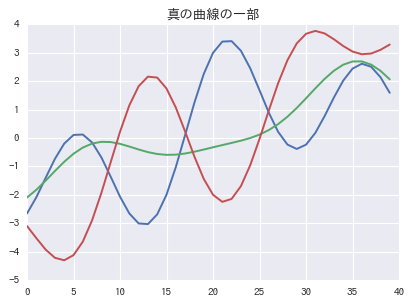

In [139]:
for y in Y_hat[:3]:
    plt.plot(y)
    plt.title("真の曲線の一部")

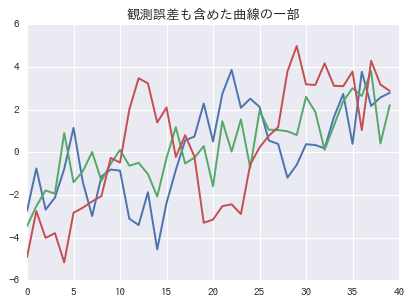

In [140]:
for y in Y[:3]:
    plt.plot(y)
    plt.title("観測誤差も含めた曲線の一部")    

In [121]:
coef_lasso_ = np.array([Lasso(alpha=0.5).fit(X, y).coef_ for y in Y.T])
coef_multi_task_lasso_ = MultiTaskLasso(alpha=1.).fit(X, Y).coef_

In [197]:
coef_ridge_ = np.array([Ridge(alpha=0.5).fit(X, y).coef_ for y in Y.T])
coef_elasticnet = np.array([ElasticNet(alpha=0.5, l1_ratio=0.5).fit(X, y).coef_ for y in Y.T])
coef_multi_task_elasticnet = MultiTaskElasticNet(alpha=1., l1_ratio=0.7).fit(X, Y).coef_

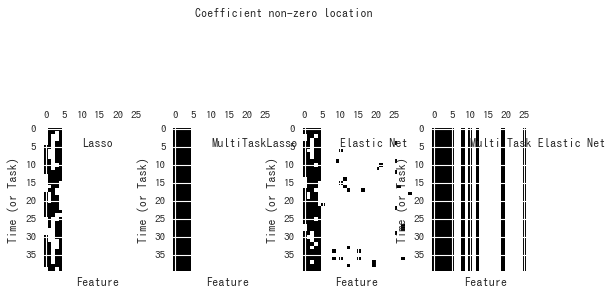

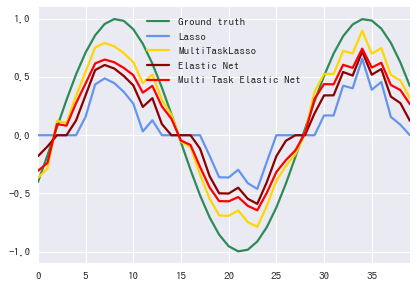

In [198]:
fig = plt.figure(figsize=(8, 5))
plt.subplot(1, 4, 1)
plt.spy(coef_lasso_)
plt.xlabel('Feature')
plt.ylabel('Time (or Task)')
plt.text(10, 5, 'Lasso')
plt.subplot(1, 4, 2)
plt.spy(coef_multi_task_lasso_)
plt.xlabel('Feature')
plt.ylabel('Time (or Task)')
plt.text(10, 5, 'MultiTaskLasso')

plt.subplot(1, 4, 3)
plt.spy(coef_elasticnet)
plt.xlabel('Feature')
plt.ylabel('Time (or Task)')
plt.text(10, 5, 'Elastic Net')

plt.subplot(1, 4, 4)
plt.spy(coef_multi_task_elasticnet)
plt.xlabel('Feature')
plt.ylabel('Time (or Task)')
plt.text(10, 5, 'Multi Task Elastic Net')

fig.suptitle('Coefficient non-zero location')

feature_to_plot = 0
plt.figure()
lw = 2
plt.plot(coef[:, feature_to_plot], color='seagreen', linewidth=lw, label='Ground truth')
plt.plot(coef_lasso_[:, feature_to_plot], color='cornflowerblue', linewidth=lw, label='Lasso')
plt.plot(coef_multi_task_lasso_[:, feature_to_plot], color='gold', linewidth=lw, label='MultiTaskLasso')

plt.plot(coef_elasticnet[:, feature_to_plot], color='darkred', linewidth=lw, label='Elastic Net')
plt.plot(coef_multi_task_elasticnet[:, feature_to_plot], color='red', linewidth=lw, label='Multi Task Elastic Net')

plt.legend(loc='upper center')
plt.axis('tight')
plt.ylim([-1.1, 1.1])
plt.show()

- Lossoのスパースパターンは穴あき。つまり個々の観測データだけで推定するから、利用する特徴量もバラバラ。
- Multi-task Lossoだと全タスクでx[0]~x[5]の特徴量だけ使うようになった。
- Elastic NetはRidgeの動きも含まれるので他の特徴量も選ぶ。Multi-task Elastic Net だとそれらも共通した変量を選ぶようになる


(-1.1, 1.1)

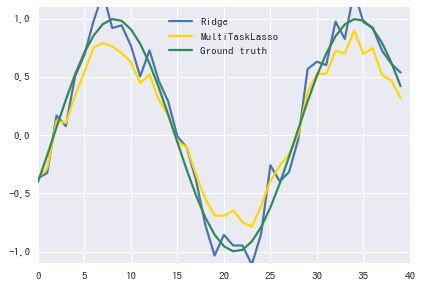

In [202]:
plt.plot(coef_ridge_[:, feature_to_plot], linewidth=lw, label='Ridge')
plt.plot(coef_multi_task_lasso_[:, feature_to_plot], color='gold', linewidth=lw, label='MultiTaskLasso')
plt.plot(coef[:, feature_to_plot], color='seagreen', linewidth=lw, label='Ground truth')
plt.legend(loc='upper center')
plt.ylim([-1.1, 1.1])

(-1.1, 1.1)

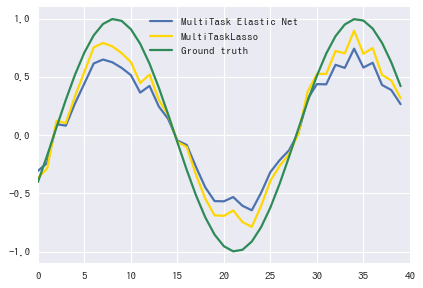

In [201]:
plt.plot(coef_multi_task_elasticnet[:, feature_to_plot], linewidth=lw, label='MultiTask Elastic Net')
plt.plot(coef_multi_task_lasso_[:, feature_to_plot], color='gold', linewidth=lw, label='MultiTaskLasso')
plt.plot(coef[:, feature_to_plot], color='seagreen', linewidth=lw, label='Ground truth')
plt.legend(loc='upper center')
plt.ylim([-1.1, 1.1])